# CFAR ML Analysis

Geoffrey Dolinger

In [13]:
%reload_ext autoreload
%autoreload 2
from CFAR_thresh import *

Establish parser and the arguments for the 4 class case [Gaussian, K-Distribution (a=0.5,b=1), K-Distribution (a=1.5,b=1),K-Distribution (a=4.5,b=1)] The Dense Network Design and Metrics are presented below:

In [14]:
parser = create_parser()

In [15]:
args = parser.parse_args(['@exp.txt','@order_K.txt'])

In [16]:
args

Namespace(L2_dense=None, L2_rnn=None, batch=1, check=False, conv_nfilters=[20, 20], conv_size=None, conv_stride=[1, 1], cpus_per_task=None, dataset='clutter_order_K.mat', dense=[200, 50], dropout_dense=0.1, dropout_rnn=0.0, dropout_spatial=None, epochs=1000, exp_index=None, exp_type=None, gpu=False, gru_size=None, image_size=[32, 32], label='order3', lrate=0.0001, lstm_size=None, maxpool=None, min_delta=0.0, nclasses=31, nogo=False, patience=100, results_path='./results', rnn_size=None, steps_per_epoch=None, testing=False, verbose=4)

The design takes the following form: 
File: ordered_ms1_Dense200_50_drop_0_100_LR_0_000100_model_plot.png
![alt text](ordered_ms1_Dense200_50_drop_0_100_LR_0_000100_model_plot.png "4 class Model")


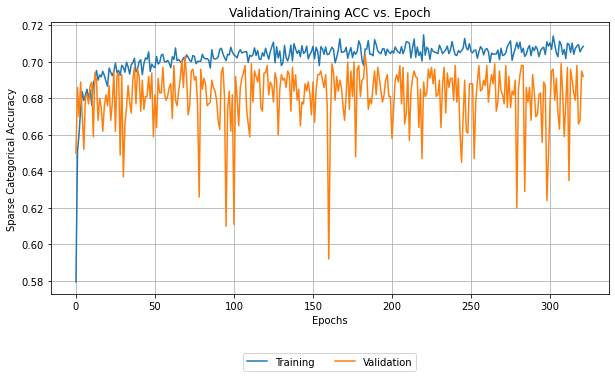

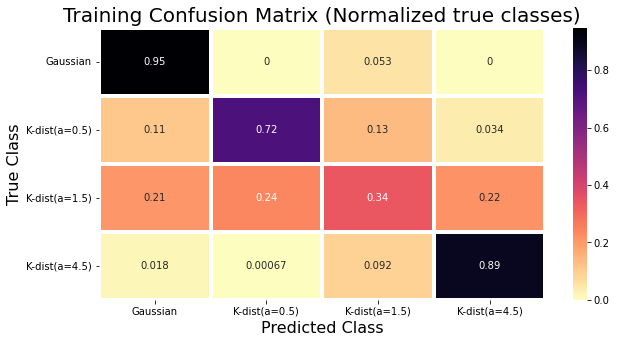

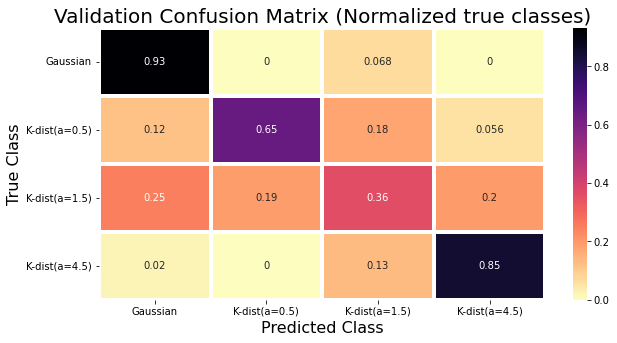

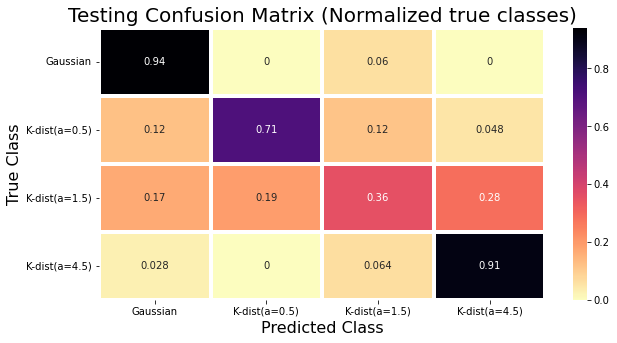

In [57]:
display_Metrics(args,test=True,save=True)

This was followed with an analysis of the data to see if the confusion could be better understood.  The following is the histogram plots for 2000 samples of length 1024.  Each Histogram is normalized. 
File: Class4_Data_Hist.png
![alt text](Class4_Data_Hist.png "Histogram of Data")

In [58]:
args = parser.parse_args(['@exp.txt','@order_3.txt'])

In [20]:
args

Namespace(check=False, nogo=False, verbose=4, testing=False, cpus_per_task=None, gpu=False, exp_type=None, label='order3', dataset='clutter_order_3.mat', results_path='./results', exp_index=None, epochs=1000, lrate=0.0001, image_size=[32, 32], nclasses=3, conv_size=None, conv_nfilters=[20, 20], conv_stride=[1, 1], maxpool=None, dropout_spatial=None, rnn_size=None, gru_size=None, lstm_size=None, dropout_rnn=0.0, L2_rnn=None, dense=[200, 50], dropout_dense=0.1, L2_dense=None, min_delta=0.0, patience=100, batch=1, steps_per_epoch=None)

The design takes the following form: 
File: order3_Dense200_50_drop_0_100_LR_0_000100_model_plot.png
![alt text](order3_Dense200_50_drop_0_100_LR_0_000100_model_plot.png "3 class Model")


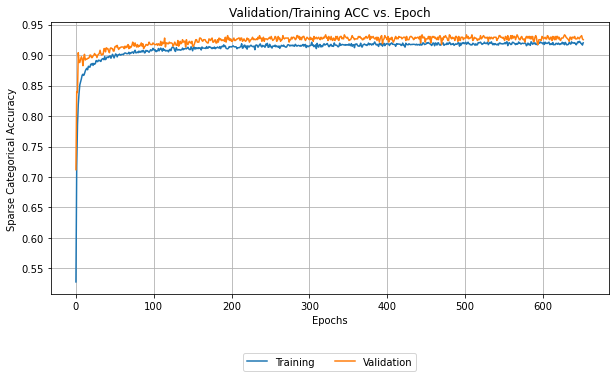

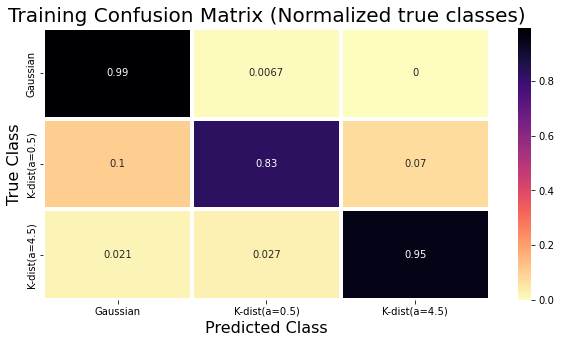

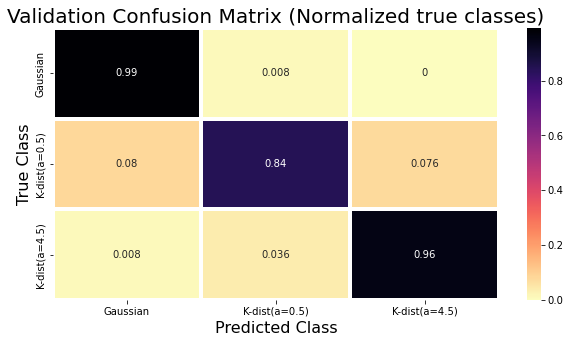

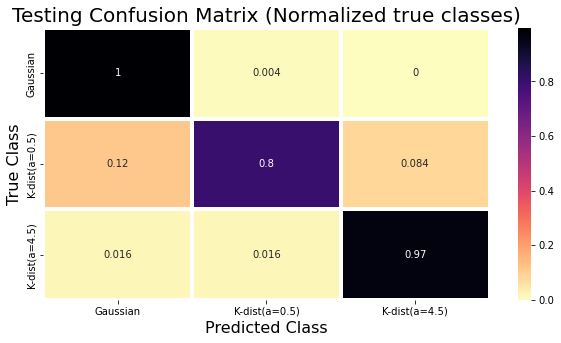

In [59]:
display_Metrics(args,test=True,save=True)

In [17]:
args = parser.parse_args(['@exp.txt','@order_K.txt'])

In [18]:
args

Namespace(L2_dense=None, L2_rnn=None, batch=1, check=False, conv_nfilters=[20, 20], conv_size=None, conv_stride=[1, 1], cpus_per_task=None, dataset='clutter_order_K.mat', dense=[200, 50], dropout_dense=0.1, dropout_rnn=0.0, dropout_spatial=None, epochs=1000, exp_index=None, exp_type=None, gpu=False, gru_size=None, image_size=[32, 32], label='order3', lrate=0.0001, lstm_size=None, maxpool=None, min_delta=0.0, nclasses=31, nogo=False, patience=100, results_path='./results', rnn_size=None, steps_per_epoch=None, testing=False, verbose=4)

In [19]:
execute_exp(args)

None


FileNotFoundError: [Errno 2] No such file or directory: 'clutter_order_K.mat'

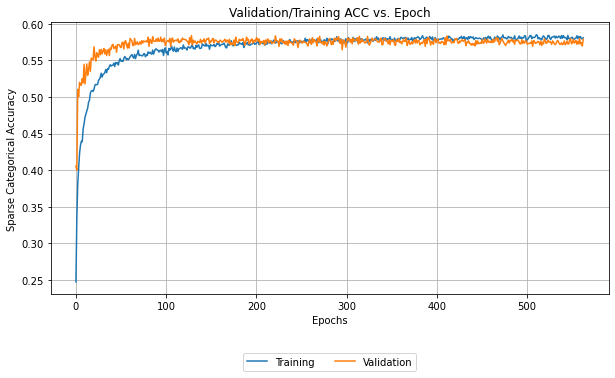

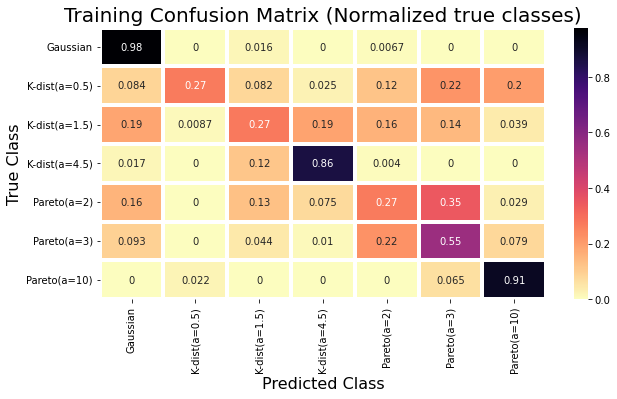

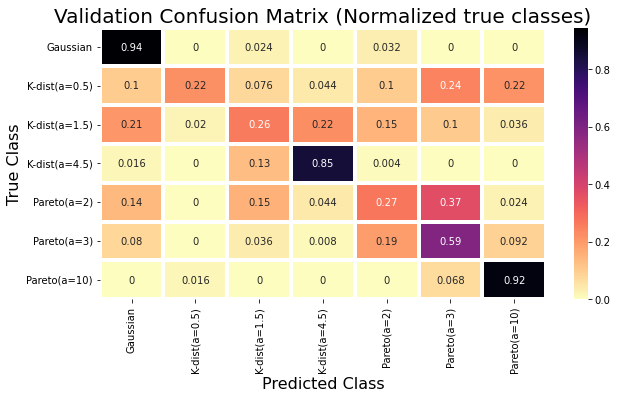

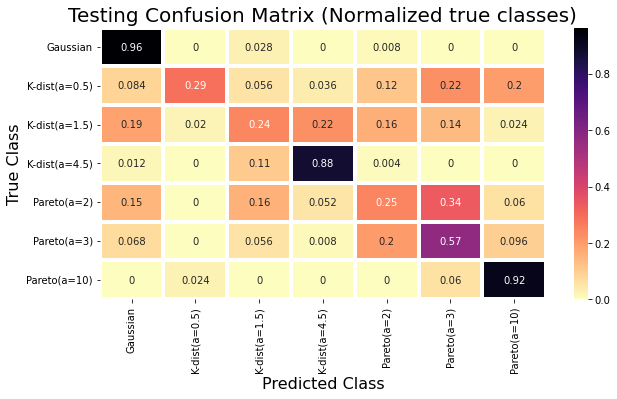

In [80]:
display_Metrics(args,test=True,save=True)

## Calling the plotting methods
First execute a set of experiments at the command line and then evaluate and plot here.

## Part 1: No Regularization

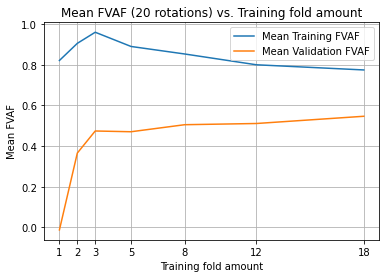

In [4]:
#Save variable is default false, if set to true it will save the plot in the location of .py file
#My functions need the args for the test set inorder to pull values properly 
filebase = "bmi_hw2_torque_1_hidden_200_100_50_25_10_5_JI_Ntraining_1_rotation_0_results.pkl"
results_norm = read_all_rotations("results_hw2", filebase)
args_norm = results_norm[0]['args']

#Function in hw2_Dolinger that will calculate the mean of every rotation and plot.  
#  Additionally, I return values needed for later Steps
mean_norm_trn,mean_norm_val,mean_norm_test, norm_test_full=display_Mean_FVAF(
    "results_hw2","bmi_hw2_torque_1_hidden_200_100_50_25_10_5_JI",args_norm, save=True)

## Reflection:

The plot above represents the mean FVAF for the Torque of the sholder in the bmi dataset.  There is no Regulation and we see an expected curve similar to HW1. At lower fold counts the training FVAF is high but lowers as more folds are introduced.  Similarly the validation FVAF increases as more folds are present for training and the model overfits less.  

## Part 2: Dropout

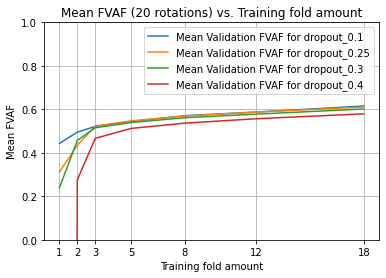

In [5]:
#My functions need the args for the test set inorder to pull values properly
filebase = "bmi_hw2_dropout_torque_1_hidden_200_100_50_25_10_5_JI_Ntraining_1_rotation_0_dropout_0.1_results.pkl"
results_drop = read_all_rotations("results_hw2_dropout", filebase)
args_drop = results_drop[0]['args']
#Function in hw2_Dolinger that will calculate the mean of every rotation and plot given different regulation values.
Mean_val=display_Mean_FVAF_Reg("results_hw2_dropout","bmi_hw2_dropout_torque_1_hidden_200_100_50_25_10_5_JI",
                               args_drop, save=True)

## Reflection:

This plot represents the mean FVAF for the torque of the sholder in the bmi dataset given dropout.  The different levels of dropout show improvement over no regularization. As the dropout probability increases we see degraded performance as too much of the model's structure is being ignored during training. I would like to try lower dropout then 0.1 as the trend here shows that the optimal at different fold counts could be less then my chose minimum.     

## Part 3: L2 Regularization

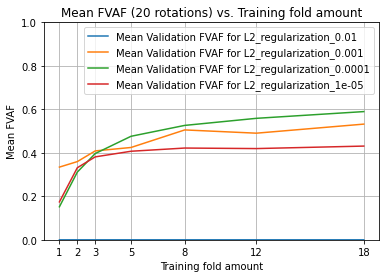

In [6]:
#My functions need the args for the test set inorder to pull values properly
filebase = "bmi_hw2_L2_torque_1_hidden_200_100_50_25_10_5_JI_Ntraining_1_rotation_0_L2_regularization_0.1_results.pkl"
results_l2 = read_all_rotations("results_hw2_l2", filebase)
args_l2 = results_l2[0]['args']
#Function in hw2_Dolinger that will calculate the mean of every rotation and plot given different regulation values.
test_val=display_Mean_FVAF_Reg("results_hw2_l2","bmi_hw2_L2_torque_1_hidden_200_100_50_25_10_5_JI",
                               args_l2, save=True)

## Reflection:

This plot represents the mean FVAF for the torque of the sholder in the bmi dataset given L2 regularization. There is a variable response for different orders of magnitude.  Notice that the model seems to collapse with high regularization alpha = 0.01.  Likely this limits the model training too much.  

## Part 4: Bake-Off

In [7]:
#returned earlier in part 1
mean_norm_test

[0.01782253837132039,
 0.3761402898817469,
 0.4788845803785368,
 0.4712629258759751,
 0.48389253528037035,
 0.5018472338119568,
 0.5333476059666953]

In [8]:
# returns an NxMx20 matrix where N is regularization factor amount and M is training folds. [in this case 4x7x20]
drop_trn, drop_val, drop_test, Ntrain, reg_drop = FVAF_matrix(
    "results_hw2_dropout", "bmi_hw2_dropout_torque_1_hidden_200_100_50_25_10_5_JI",args_drop)
#Function that calculated the mean of the validation set and recorde the maximum location.  
#  This pulls that locations test set and returns the mean across rotations
best_test_drop = best_test_wrt_val(drop_test,drop_val)

In [9]:
best_test_drop

array([0.44847786, 0.48483877, 0.51672395, 0.53749129, 0.55680402,
       0.57585884, 0.59058011])

In [10]:
# returns an NxMx20 matrix where N is regularization factor amount and M is training folds. [in this case 4x7x20]
l2_trn, l2_val, l2_test, Ntrain, reg_l2 = FVAF_matrix(
    "results_hw2_l2","bmi_hw2_L2_torque_1_hidden_200_100_50_25_10_5_JI",args_l2)
#Function that calculated the mean of the validation set and recorde the maximum location.  
#  This pulls that locations test set and returns the mean across rotations
best_test_l2 = best_test_wrt_val(l2_test,l2_val)

In [11]:
best_test_l2

array([0.34606721, 0.36695135, 0.41472758, 0.47511132, 0.51931925,
       0.54224453, 0.57104326])

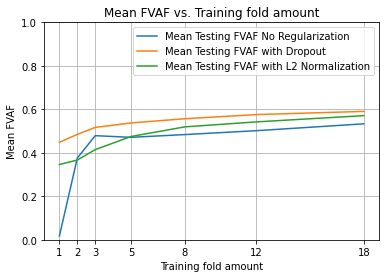

In [12]:
display_bakeoff_plot(Ntrain,mean_norm_test, best_test_drop, best_test_l2, save=True)

## Reflection:

In general my runs show that dropout outperforms the other options.  This could be due to not having enough of a span in the L2 regularization alpha values.   

In [13]:
norm_f1 = norm_test_full[0]
norm_f18 = norm_test_full[-1]

In [14]:
drop_f1_best, drop_f18_best = test_folds_for_Ttest(drop_test,drop_val) 

In [15]:
l2_f1_best, l2_f18_best = test_folds_for_Ttest(l2_test,l2_val) 

In [16]:
T_nd_f1, P_nd_f1 = scipy.stats.ttest_rel(norm_f1, drop_f1_best)
print("For pair T-Test(1 Fold) of best Normal and Best Dropout T:%f and P:%f"%(T_nd_f1,P_nd_f1))

For pair T-Test(1 Fold) of best Normal and Best Dropout T:-5.295754 and P:0.000041


In [17]:
T_nl_f1, P_nl_f1 = scipy.stats.ttest_rel(norm_f1, l2_f1_best)
print("For pair T-Test(1 Fold) of best Normal and Best L2 T:%f and P:%f"%(T_nl_f1,P_nl_f1))

For pair T-Test(1 Fold) of best Normal and Best L2 T:-3.884226 and P:0.000998


In [18]:
T_dl_f1, P_dl_f1 = scipy.stats.ttest_rel(drop_f1_best, l2_f1_best)
print("For pair T-Test(1 Fold) of best Dropout and Best L2 T:%f and P:%f"%(T_dl_f1,P_dl_f1))

For pair T-Test(1 Fold) of best Dropout and Best L2 T:2.460617 and P:0.023617


In [19]:
T_nd_f18, P_nd_f18 = scipy.stats.ttest_ind(norm_f18, drop_f18_best)
print("For pair T-Test(18 Foldd) of best Normal and Best Dropout T:%f and P:%f"%(T_nd_f18,P_nd_f18))

For pair T-Test(18 Foldd) of best Normal and Best Dropout T:-2.580743 and P:0.013845


In [20]:
T_nl_f18, P_nl_f18 = scipy.stats.ttest_rel(norm_f18, l2_f18_best)
print("For pair T-Test(18 Folds) of best Normal and Best L2 T:%f and P:%f"%(T_nl_f18,P_nl_f18))

For pair T-Test(18 Folds) of best Normal and Best L2 T:-5.700905 and P:0.000017


In [21]:
T_dl_f18, P_dl_f18 = scipy.stats.ttest_rel(drop_f18_best, l2_f18_best)
print("For pair T-Test(18 Folds) of best Dropout and Best L2 T:%f and P:%f"%(T_dl_f18,P_dl_f18))

For pair T-Test(18 Folds) of best Dropout and Best L2 T:3.087833 and P:0.006057


## Final Reflection
Given the Null Hypotesis that the results have the same mean we can see that all 6 tests have P values below the alpha of .05.  Therefore we can reject the null hypothesis ans assert that the different methods received significantly different results.  Regarding selection and the posted question:
1. For training set size 1, which mothod is preferable?
My results show that the no regularization method overfits and has low performance for the testing set.  Though both dropout and L2 regularization are an improvement, dropout with a 0.1 probability showed the best results.  I would chose an optimized dropout method.  
2. For training set size 18, which mothod is preferable?
Similar to the case with set size 1, the dropout method showed the best performance.  As I mentioned earlier I would like to explore more values of L2 regularization to see is it has better performance at different ranges.  
3. Looking at the test performance curves, can you conclude anything about which model approach is most appropriate in general?
Definately some form of dropout or regularization is necessary with a noisy or complex data set.  In this specific case my dropout results were superior, but L2 regularization looks stable across fold sizes and could be better in a differtent application.  

## Set-up to run Training Run Locally